2

In [1]:
import numpy as np
a = np.random.random((2, 2))
print(a)
for i in range(2):
    print(sum(a[i,:])/min(a[:,i]))

[[0.82448381 0.90708695]
 [0.67926554 0.67147147]]
2.5491809399098453
2.011607449826957


4

In [3]:
x = np.ones(10) 
i = np.array([0, 1, 2, 3, 5, 5, 5, 8])
for k in range(len(i)):
    x[i[k]] += 1
print(x)

[2. 2. 2. 2. 1. 4. 1. 1. 2. 1.]


3 (исходя из предположения, что такой элемент будет)

In [4]:
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
mask = x == 0 
x = np.append(x,min(x))
x = np.delete(x, 0)
print(max(x[mask]))

5


In [4]:
import numpy as np
import matplotlib.pyplot as plt
def kmeans(obs, k, iter, thresh = 1e-05):
    centroids = 100*np.random.random(( obs.shape[0],k))
    clusters = np.zeros(obs.shape[1])
    sum = 0
    #print(obs)
    #print(obs[:,0])
    #print(obs[0,:])
    #print(obs.shape)
    #print((obs[0],axis=1))
    #print(np.linalg.norm(centroids,axis=0))
    i = 0
    while( i<20 ): 
        sum = 0
        for j in range(obs.shape[1]): 
            for l in range(k):
                if(np.linalg.norm(obs[:,j] - centroids[:,l]) < np.linalg.norm(obs[:,j] - centroids[:,int(clusters[j])]) ):
                    clusters[j] = l
                    ###print(clusters)
        #print(centroids)
        for l in range(k):
            mask = clusters == l
            for j0 in range(obs.shape[0]):
                centroids[j0][l] = np.mean(obs[j0,mask])
                if(len(obs[j0,mask] - centroids[j0][l]) !=0 ):
                    sum+= np.linalg.norm(obs[j0,mask] - centroids[j0][l])/len(obs[j0,mask] - centroids[j0][l])
                #rint(len(obs[j0,mask] - centroids[j0][l]))
                #print(obs[j0,mask] - centroids[j0][l])
        #rint(sum)
        i +=1
                #print(centroids[j0][l])
        #print(centroids)
            #print(l)
            #print( obs[0,mask]) 
            #print( sum(obs[0,mask])) 
            #print( sum(obs[0,mask])/len(obs[0,mask])) 
            #print( np.mean(sum(obs[0,mask]))) 
            #print( np.mean(obs[0,mask])) 
    ###print(centroids)
#kmeans(np.random.random((2, 8)),5)
    #print(centroids)
    return clusters,sum

1

In [1]:
import numpy as np
a = np.random.random((10, 3))
print(a)
print(a[np.arange(10), np.argmin(np.abs(a - 0.5), axis = 1)])

[[0.04470656 0.20922534 0.57761255]
 [0.47403203 0.66771973 0.59015591]
 [0.54153735 0.74403216 0.43720415]
 [0.00305673 0.92838677 0.76366179]
 [0.81823916 0.48545723 0.94122622]
 [0.08796827 0.17271552 0.24696145]
 [0.04980034 0.3928898  0.67643692]
 [0.59674199 0.53591141 0.67053137]
 [0.67257203 0.17998979 0.19011201]
 [0.28962797 0.28553895 0.47082456]]
[0.57761255 0.47403203 0.54153735 0.76366179 0.48545723 0.24696145
 0.3928898  0.53591141 0.67257203 0.47082456]


6

23.546240254684758


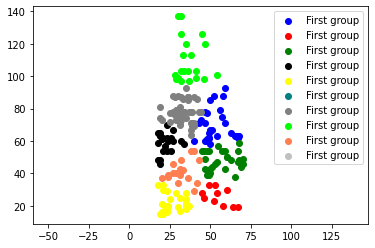

34.88345978371766


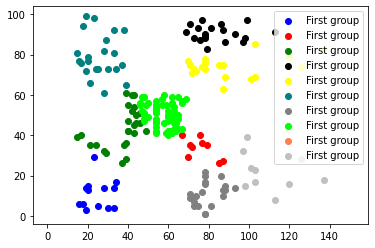

21.0571323308748


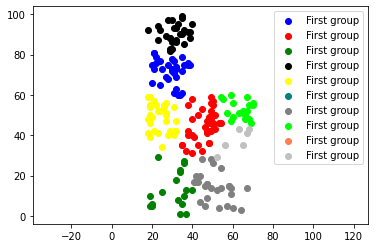

In [6]:
url = 'https://raw.githubusercontent.com/sharmaroshan/Clustering-of-Mall-Customers/master/Mall_Customers.csv'
data = np.loadtxt(url, delimiter=',', dtype=object, skiprows=1)
data[:, 1] = data[:, 1] == 'Male'
data = data.astype(float)
#print(data.shape)
#data1 = np.arange(2*data.shape[0]).reshape(( data.shape[0],2))
data1 = np.arange(0)
data1 = np.append(data1,data[:,2])
data1 = np.append(data1,data[:,3])
data1 = np.reshape(data1,(2,data.shape[0]))
#print(data1)
#print(data1.shape)
clusters = kmeans(data1,10,20)
my_color = ('b','r','g','black','yellow','teal','gray','lime','coral','silver','navy')
print(clusters[1])
for l in range(10): # визуализация
    mask = clusters[0] == l
    plt.scatter(data1[0,mask],data1[1,mask], color=my_color[l], label='First group')
plt.axis('equal')
plt.legend()
plt.show()
data1 = np.arange(0)
data1 = np.append(data1,data[:,3])
data1 = np.append(data1,data[:,4])
data1 = np.reshape(data1,(2,data.shape[0]))
#print(data1)
#print(data1.shape)
clusters = kmeans(data1,10,20)
my_color = ('b','r','g','black','yellow','teal','gray','lime','coral','silver','navy')
print(clusters[1])
for l in range(10): # визуализация
    mask = clusters[0] == l
    plt.scatter(data1[0,mask],data1[1,mask], color=my_color[l], label='First group')
plt.axis('equal')
plt.legend()
plt.show()
data1 = np.arange(0)
data1 = np.append(data1,data[:,2])
data1 = np.append(data1,data[:,4])
data1 = np.reshape(data1,(2,data.shape[0]))
#print(data1)
#print(data1.shape)
clusters = kmeans(data1,10,20)
my_color = ('b','r','g','black','yellow','teal','gray','lime','coral','silver','navy')
print(clusters[1])
for l in range(10): # визуализация
    mask = clusters[0] == l
    plt.scatter(data1[0,mask],data1[1,mask], color=my_color[l], label='First group')
plt.axis('equal')
plt.legend()
plt.show()